In [1]:
import numpy as np
import numpy.random as r
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets, linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
df = pd.read_csv("hotel_bookings.csv")
N = df.shape[0]
k = df.shape[1]
df.shape

(119390, 32)

In [3]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [4]:
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [5]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [6]:
# Create scaler and encoder
scaler = StandardScaler()
enc = OneHotEncoder(handle_unknown='ignore')

In [7]:
# Set target y
y = np.array(df.is_canceled).reshape(N,1)
y

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [8]:
# define the one-hot encoding function
def to_onehot(arr):
    arr = np.array(arr)
    if len(arr.shape) == 1:
        arr = arr.reshape(arr.shape[0],1)
    return enc.fit_transform(arr).toarray()

to_onehot(df.hotel)

# define df to np array function
def to_nparray(arr):
    arr = np.array(arr)
    if len(arr.shape) == 1:
        arr = arr.reshape(arr.shape[0],1)
    return arr

In [9]:
X_room_match = (df.reserved_room_type == df.assigned_room_type)-0
np.array(X_room_match)

array([1, 1, 0, ..., 1, 1, 1], dtype=int32)

In [10]:
# Create X by processing each column and combine

# hotel: one-hot
X_hotel = to_onehot(df.hotel)

# is_canceled: use as y

# lead_time: No change
X_lead_time = to_nparray(df.lead_time)

# *arrival_date_year: one-hot/discard
    #X_arrival_date_year = to_onehot(df.arrival_date_year)

# *arrival_date_month: one-hot/discard
    #X_arrival_date_month = to_onehot(df.arrival_date_month)

# *arrival_date_week_number: No change/discard
    #X_arrival_date_week_number = to_nparray(df.arrival_date_week_number)

# *arrival_date_day_of_month: discard
# Because by looking at the data, the distribution is very average;
# If using numbers directly, it adds relationships of sizes which is not the real case;
# If transform to one-hot, it adds to many features (sparse of 31 features).

# stays_in_weekend_nights: No change
# + stays_in_week_nights: No change
# + adults: No change
# + children: No change
# + babies: No change
X_5features = to_nparray(df[['stays_in_weekend_nights','stays_in_week_nights','adults','children','babies']])

# meal: one-hot
X_meal = to_onehot(df.meal)

# *country: one-hot/discard
#X_country = to_onehot(df.country)

# market_segment: one-hot
X_market_segment = to_onehot(df.market_segment)

# distribution_channel: one-hot
X_distribution_channel = to_onehot(df.distribution_channel)

# is_repeated_guest: No change
# previous_cancellations: No change
# previous_bookings_not_canceled: No change
X_3features = to_nparray(df[['is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']])

# *reserved_room_type: one-hot
# *assigned_room_type: one-hot
# This two would add too many features, so combine
# room_match: bool -> int
    #X_reserved_room_type = to_onehot(df.reserved_room_type)
    #X_assigned_room_type = to_onehot(df.assigned_room_type)
X_room_match = np.array((df.reserved_room_type == df.assigned_room_type) - 0)
X_room_match = X_room_match.reshape(X_room_match.shape[0],1)

# booking_changes: No change
X_booking_changes = to_nparray(df.booking_changes)

# deposit_type: one-hot
X_deposit_type = to_onehot(df.deposit_type)

# agent: one-hot/discard
    #X_agent = to_onehot(df.agent)

# *company: one-hot/discard, too many null
    #X_company = to_onehot(df.company)

# days_in_waiting_list: No change
X_days_in_waiting_list = to_nparray(df.days_in_waiting_list)

# customer_type: one-hot
X_customer_type = to_onehot(df.customer_type)

# adr: No change
# required_car_parking_spaces: No change
# total_of_special_requests: No change
X_3f2 = to_nparray(df[['adr','required_car_parking_spaces','total_of_special_requests']])

# reservation_status: discard
# reservation_status_date: discard



In [12]:
features_use = (X_hotel, X_lead_time, X_5features, X_meal, X_market_segment, X_distribution_channel, X_3features,
                X_room_match, X_booking_changes, X_deposit_type, X_days_in_waiting_list, X_customer_type, X_3f2)

X = np.hstack(features_use)
X = scaler.fit_transform(X) # do scaling before train_test_split


In [13]:
#df_cleaned = pd.DataFrame(X)
#df_cleaned.to_csv("cleaned_data.csv")

# ***注意！***
# 这里输出的csv file第一列会有index，如果重新read_csv读进来的话，第一列index会作为数据读进来，
# 所以输出之后可能需要excel里手动删除第一列再用，或者读进来之后再drop第一列


In [124]:
# drop null values in X
yX = np.hstack((y,X))
df_yX = pd.DataFrame(yX)
df_yX = df_yX.dropna()

y2 = df_yX[0]
X2 = df_yX.drop([0],axis = 1)
y = np.array(y2).reshape(y2.shape[0],1)
X = np.array(X2)



In [127]:
print(X.shape)
print(y.shape)

(119386, 42)
(119386, 1)


## Neural Network

In [199]:
from sklearn.neural_network import MLPClassifier

In [200]:
#Split the data into training and test set.
# Since the dataset is too large and training take too long, use 40% data for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.6)

X_train.shape

(47754, 42)

In [201]:
alphas = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
acc_train_relu = []
acc_test_relu = []

In [202]:
def nn_relu(alp, X_train, X_test, y_train, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(20,10), activation='relu', alpha=alp)
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train) #calculate the accuracy for training set
    acc_train_relu.append(accuracy_train)
    accuracy_test = clf.score(X_test, y_test) #calculate the accuracy for testing set
    acc_test_relu.append(accuracy_test)
    print("For alpha = ", alp)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_relu,acc_test_relu

In [203]:
for alp in alphas:
    acc_train_relu, acc_test_relu = nn_relu(alp, X_train, X_test, y_train, y_test)

C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.0001
Accuracy for training data is: 0.8366210160405411
Accuracy for testing data is: 0.8293360509269601


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.001
Accuracy for training data is: 0.8362859655735645
Accuracy for testing data is: 0.8288893232075051


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.01
Accuracy for training data is: 0.8366419566947272
Accuracy for testing data is: 0.8288334822425731


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.1
Accuracy for training data is: 0.8338777903421702
Accuracy for testing data is: 0.8275212195666741


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  1
Accuracy for training data is: 0.8246848431545002
Accuracy for testing data is: 0.8214205941478668


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  10
Accuracy for training data is: 0.8005821501863718
Accuracy for testing data is: 0.8024207058297967


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  100
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  1000
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


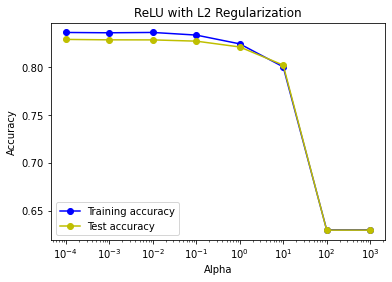

In [206]:
plt.title("ReLU with L2 Regularization")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(alphas, acc_train_relu, 'bo-', label = "Training accuracy")
plt.plot(alphas, acc_test_relu, 'yo-',label='Test accuracy')
plt.legend()
plt.show()


In [211]:
acc_train_sigmoid = []
acc_test_sigmoid = []

In [212]:
def nn_sigmoid(alp, X_train, X_test, y_train, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(20,10), activation='logistic', alpha=alp)
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train) #calculate the accuracy for training set
    acc_train_sigmoid.append(accuracy_train)
    accuracy_test = clf.score(X_test, y_test) #calculate the accuracy for testing set
    acc_test_sigmoid.append(accuracy_test)
    print("For alpha = ", alp)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_sigmoid, acc_test_sigmoid

In [213]:
for alp in alphas:
    acc_train_sigmoid, acc_test_sigmoid = nn_sigmoid(alp, X_train, X_test, y_train, y_test)

C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.0001
Accuracy for training data is: 0.831993131465427
Accuracy for testing data is: 0.8271582532946169


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.001
Accuracy for training data is: 0.830862336139381
Accuracy for testing data is: 0.8248268930087111
For alpha =  0.01
Accuracy for training data is: 0.8312602085689157
Accuracy for testing data is: 0.8268511279874916


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.1
Accuracy for training data is: 0.8232608786698496
Accuracy for testing data is: 0.8225513736877373


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  1
Accuracy for training data is: 0.8072203375633454
Accuracy for testing data is: 0.8080048023229841


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  10
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  100
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  1000
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


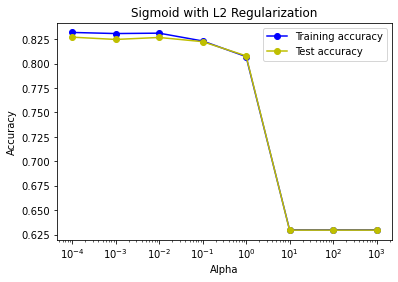

In [214]:
plt.title("Sigmoid with L2 Regularization")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(alphas, acc_train_sigmoid, 'bo-', label = "Training accuracy")
plt.plot(alphas, acc_test_sigmoid, 'yo-',label='Test accuracy')
plt.legend()
plt.show()

In [215]:
acc_train_tanh = []
acc_test_tanh = []

In [216]:
def nn_tanh(alp, X_train, X_test, y_train, y_test):
    clf = MLPClassifier(hidden_layer_sizes=(20,10), activation='tanh', alpha=alp)
    clf.fit(X_train, y_train)
    accuracy_train = clf.score(X_train, y_train) #calculate the accuracy for training set
    acc_train_tanh.append(accuracy_train)
    accuracy_test = clf.score(X_test, y_test) #calculate the accuracy for testing set
    acc_test_tanh.append(accuracy_test)
    print("For alpha = ", alp)
    print("Accuracy for training data is:", accuracy_train)
    print("Accuracy for testing data is:", accuracy_test)
    return acc_train_tanh, acc_test_tanh

In [217]:
for alp in alphas:
    acc_train_tanh, acc_test_tanh = nn_tanh(alp, X_train, X_test, y_train, y_test)

C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.0001
Accuracy for training data is: 0.8417514763161201
Accuracy for testing data is: 0.8314161268706723


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.001
Accuracy for training data is: 0.8409138501486787
Accuracy for testing data is: 0.8316813714540987


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  0.01
Accuracy for training data is: 0.8406416216442602
Accuracy for testing data is: 0.8301457449184722
For alpha =  0.1
Accuracy for training data is: 0.8328098169786824
Accuracy for testing data is: 0.829350011168193


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  1
Accuracy for training data is: 0.8201197805419441
Accuracy for testing data is: 0.8199268483359392


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  10
Accuracy for training data is: 0.8012313104661389
Accuracy for testing data is: 0.802783672101854


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  100
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


C:\Users\ylwu5\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


For alpha =  1000
Accuracy for training data is: 0.6297692339908699
Accuracy for testing data is: 0.6294951976770159


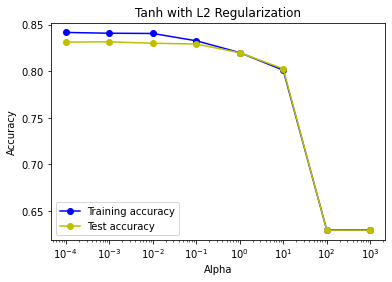

In [218]:
plt.title("Tanh with L2 Regularization")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")
plt.xscale("log")
plt.plot(alphas, acc_train_tanh, 'bo-', label = "Training accuracy")
plt.plot(alphas, acc_test_tanh, 'yo-',label='Test accuracy')
plt.legend()
plt.show()